## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].nunique()
print(f"Mice count for entire dataset is {mice_count}")

Mice count for entire dataset is 249


In [3]:
# Using duplicated() to find duplicate mice data that occur in column "Mouse ID" and "Timepoint"
# Saving returned boolean series as another column "Duplicate Status" in the same dataframe
combined_data['Duplicate Status'] = combined_data.duplicated(subset=['Mouse ID','Timepoint'])
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicate Status
0,b128,0,45.0,0,Capomulin,Female,9,22,False
1,f932,0,45.0,0,Ketapril,Male,15,29,False
2,g107,0,45.0,0,Ketapril,Female,2,29,False
3,a457,0,45.0,0,Ketapril,Female,11,30,False
4,c819,0,45.0,0,Ketapril,Male,21,25,False


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Storing duplicate mice by ID number in another dataframe
duplicate = combined_data.loc[combined_data["Duplicate Status"]==True,:]

# Storing duplicate mouse by ID number in a numpy array
dup_id = duplicate["Mouse ID"].unique()
dup_id

array(['g989'], dtype=object)

In [5]:
# Locating and displaying all data with duplicate Mouse ID
duplicate_mouse = combined_data.loc[combined_data["Mouse ID"] == dup_id[0], :]
duplicate_mouse.drop(columns="Duplicate Status")

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[combined_data["Mouse ID"] != dup_id[0], :]
clean_data = clean_data.drop(columns=["Duplicate Status"])
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_data["Mouse ID"].unique()

print(f"Total Mice count for clean dataset is {len(clean_mice_count)}")

Total Mice count for clean dataset is 248


## Summary Statistics

In [8]:
# Using groupby to find statistical summary values for each drug regimen
drug_regimen_data = clean_data[["Tumor Volume (mm3)","Drug Regimen"]]
drug_regimen_data = clean_data.groupby(["Drug Regimen"])

In [9]:
# Calculating statistical values like mean, median, variance, standard deviation and SEM of tumor volume for each drug regimen 
mean_tumorvolume = drug_regimen_data["Tumor Volume (mm3)"].mean()

median_tumorvolume = drug_regimen_data["Tumor Volume (mm3)"].median()

var_tumorvolume = drug_regimen_data["Tumor Volume (mm3)"].var()

std_tumorvolume = drug_regimen_data["Tumor Volume (mm3)"].std()

sem_tumorvolume = drug_regimen_data["Tumor Volume (mm3)"].sem()

In [10]:
# Creating a new dataframe to store statistical summary values
summary_tumorvolume = pd.DataFrame({"Mean Tumor Volume":mean_tumorvolume, 
                                    "Median Tumor Volume":median_tumorvolume, 
                                    "Tumor Volume Variance":var_tumorvolume, 
                                    "Tumor Volume Std. Dev.":std_tumorvolume,
                                    "Tumor Volume Std. Err.":sem_tumorvolume})
summary_tumorvolume

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generating the same summary statistics table using aggregation method
summary_tumorvolume_agg = clean_data.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":
                                                                    ["mean", "median", "var", "std", "sem"]})
summary_tumorvolume_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
# Counting and Sorting it in descending order for Timepoint column in groupby Drug Regimen Data
total_timepoints = drug_regimen_data["Timepoint"].count().sort_values(ascending=False)
total_timepoints

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

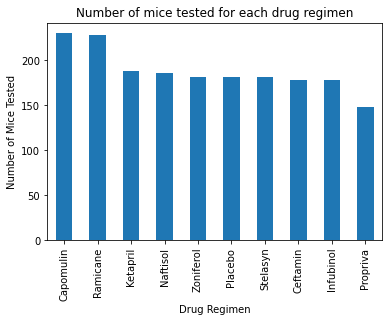

In [13]:
# Using dataframe.plot function to plot a bar graph for total number of mice tested for each drug regimen
total_timepoints.plot(kind='bar', 
                      title='Number of mice tested for each drug regimen',
                      ylabel='Number of Mice Tested')
                                  

plt.show()

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Calculating value counts for each drug regimen and storing it in a new dataseries
drug_data = clean_data["Drug Regimen"].value_counts()

# Storing index data in x axis
x_axis = drug_data.index.values
print(x_axis)

# Storing value data in y axis
y_axis = drug_data.values
print(y_axis)

['Capomulin' 'Ramicane' 'Ketapril' 'Naftisol' 'Zoniferol' 'Placebo'
 'Stelasyn' 'Ceftamin' 'Infubinol' 'Propriva']
[230 228 188 186 182 181 181 178 178 148]


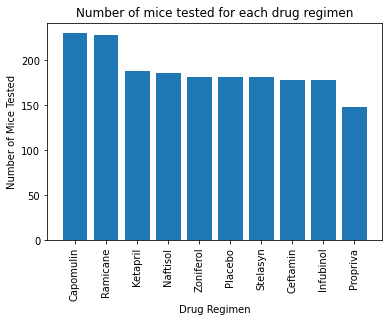

In [15]:
# Using pyplot to plot a bar graph of total number of mice tested for each drug regimen
plt.bar(x_axis, y_axis)
plt.xticks(rotation =90)
plt.title("Number of mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

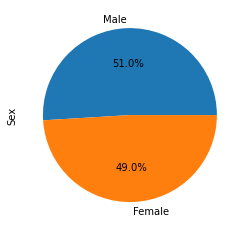

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_ratio = clean_data["Sex"].value_counts()

sex_ratio.plot.pie(subplots=True, autopct="%1.1f%%")
plt.show()

In [17]:
# Defining Labels and Sizes for Pie Plot
labels = sex_ratio.index.values
sizes = sex_ratio.values

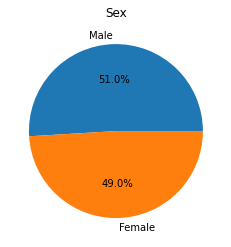

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouseid = clean_data.groupby("Mouse ID")
last_timepoint = mouseid["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_data_last_timepoint = pd.merge(last_timepoint, clean_data, on=["Mouse ID", "Timepoint"])
clean_data_last_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# Determine outliers using upper and lower bounds
for drug in treatments:
    drug_df = clean_data_last_timepoint.loc[clean_data_last_timepoint["Drug Regimen"] == drug]
    tumor_data_df = drug_df.iloc[:,2]
    tumor_vol.append(tumor_data_df)
    
    quartiles = tumor_data_df.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq -lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_data_df.loc[(tumor_data_df > upper_bound) | (tumor_data_df < lower_bound)]

    print(f"Statistical details for {drug}\n"
          f"IQR: {iqr}\n"
          f"Upper Bound: {upper_bound} & Lower Bound: {lower_bound}\n"
          f"{drug}'s Potential Outliers: {outliers}\n"
          "-----------------------------------------------------")

Statistical details for Capomulin
IQR: 7.781863460000004
Upper Bound: 51.83201549 & Lower Bound: 20.70456164999999
Capomulin's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------------------------------------------------
Statistical details for Ramicane
IQR: 9.098536719999998
Upper Bound: 54.30681135 & Lower Bound: 17.912664470000003
Ramicane's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------------------------------------------------
Statistical details for Infubinol
IQR: 11.477135160000003
Upper Bound: 82.74144559000001 & Lower Bound: 36.83290494999999
Infubinol's Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
-----------------------------------------------------
Statistical details for Ceftamin
IQR: 15.577752179999997
Upper Bound: 87.66645829999999 & Lower Bound: 25.355449580000002
Ceftamin's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------

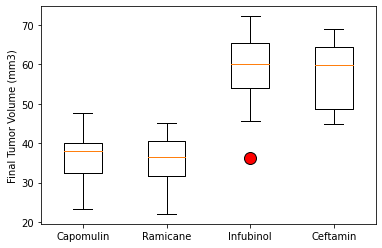

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
circle = dict(markerfacecolor = 'red', markeredgecolor='black', markersize = 12)
plt.boxplot(tumor_vol, labels=treatments, flierprops = circle)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

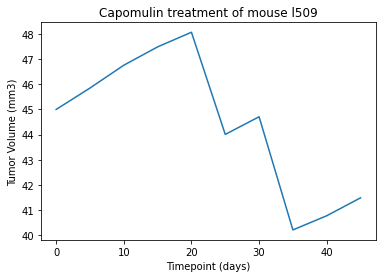

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
treated_mouse = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "l509")]

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.plot(treated_mouse["Timepoint"],treated_mouse["Tumor Volume (mm3)"])
plt.show()

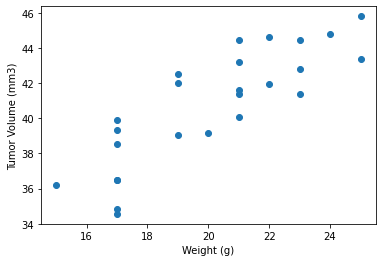

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")]

mouseid_capomulin = capomulin_data.groupby("Mouse ID")
avg_capomulin = mouseid_capomulin.mean()
x_values = avg_capomulin["Weight (g)"]
y_values = avg_capomulin["Tumor Volume (mm3)"]

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_values, y_values)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


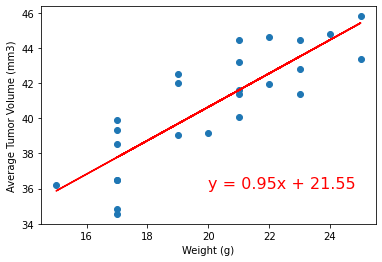

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = stats.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_value = x_values*slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_value,'r')
plt.annotate(line_eq, (20,36), color='red', fontsize="16")

plt.show()